In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
frog_data = pd.read_csv("frogs.csv")

# Завдання 1
Визначити на якій середній відстані від поселення спостерігаються жаби,а на якій – ні. Порівняти та проаналізувати отримані значення.

In [4]:
frog_Observed = frog_data[frog_data["pres.abs"] == 1]
frog_NOT_Observed = frog_data[frog_data["pres.abs"] == 0]

frog_Observed_distance = np.mean(frog_Observed["distance"]).round(0)
frog_NOT_Observed_distance = np.mean(frog_NOT_Observed["distance"]).round(0)

print("Середня відстань до населеного пункту у місцях, де жаби спостерігалися  --- ", frog_Observed_distance)
print("Середня відстань до населеного пункту у місцях, де жаби НЕ спостерігалися --- ", frog_NOT_Observed_distance)

Середня відстань до населеного пункту у місцях, де жаби спостерігалися  ---  854.0
Середня відстань до населеного пункту у місцях, де жаби НЕ спостерігалися ---  2573.0


Відповідно, можна зробити висновок: можливість спостерігати жаб вища у місцях, які знаходяться ближче до населених пунктів.

# Завдання 2
Перевірити чи нормально розподілена середня кількість опадів.

*Основна гіпотеза* - вибірка, яка описує середню кількість опадів нормально розподілена

*Альтернативна гіпотеза* - вибірка розподілена не нормально

*Рівень значущості* - 0.05

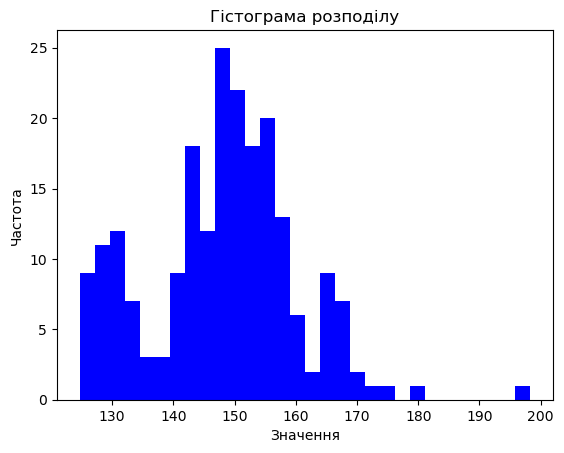

0.08013357573404803


In [9]:
avrain = np.array(frog_data["avrain"].round(2))
plt.hist(avrain, bins=30, color='b') 
plt.xlabel('Значення')
plt.ylabel('Частота')
plt.title('Гістограма розподілу')
plt.show()
print(stats.normaltest(avrain).pvalue)

Оскільки p-значення вище заданого рівня значущості, то ми **приймаємо** основну гіпотезу. Робимо висновок, що середня кількість опадів розподілена нормально.

# Завдання 3
Визначити, чи є зв’язок між кількістю місць для розмноження та відстанню до поселення.

*Основна гіпотеза* - коефіцієнт кореляції дорівнює 0 [дані незалежні]

*Альтернативна гіпотеза* - коефіцієнт кореляції НЕ дорівнює 0

*Критерій перевірки* - Критерій Спірмена

*Рівень значущості* - 0.05

In [16]:
NoOfSites = np.array(frog_data["NoOfSites"].round(2))
distance = np.array(frog_data["distance"].round(2))
print(stats.spearmanr(NoOfSites, distance).pvalue)

1.1854086024923914e-14


Оскільки p-значення майже нульове, тобто менше нашого рівня значущості, то ми відхиляємо основну гіпотезу. Відповідно, приймаємо альтернативну гіпотезу, що стверджує про залежність наших даних.

# Завдання 4
Перевірити за допомогою статистичних гіпотез чи однакові середні висоти, на яких спостерігаються жаби і на яких – ні.

*Основна гіпотеза* - різниця математичних сподівань дорівнює нулю

*Альтернативна гіпотеза* - різниця математичних сподівань НЕ дорівнює нулю

*Критерій перевірки* - ![Alt text](image.png)

*Рівень значущості* - 0.05

In [17]:
frog_Observed_Altitude = frog_Observed["altitude"]
frog_NOT_Observed_Altitude = frog_NOT_Observed["altitude"]

print(stats.ttest_ind(frog_Observed_Altitude, frog_NOT_Observed_Altitude).pvalue)

0.00046281302837254353


Оскільки p-значення менше нашого рівня значущості, то ми відхиляємо основну гіпотезу. Відповідно, приймаємо альтернативну гіпотезу. Отже, середні висоти у місцях де спостерігалися та не спостерігалися жаби - різні.